In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

In [2]:
aisles = pd.read_csv('C:/Users/Max/Documents/Projects/Instacart Market Basket/Data/aisles/aisles.csv')
departments = pd.read_csv('C:/Users/Max/Documents/Projects/Instacart Market Basket/Data/departments/departments.csv')
products = pd.read_csv('C:/Users/Max/Documents/Projects/Instacart Market Basket/Data/products/products.csv')

In [3]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
orders = pd.read_csv('C:/Users/Max/Documents/Projects/Instacart Market Basket/Data/orders/orders.csv')
order_products__prior = pd.read_csv('C:/Users/Max/Documents/Projects/Instacart Market Basket/Data/order_products__prior/order_products__prior.csv')
order_products__train = pd.read_csv('C:/Users/Max/Documents/Projects/Instacart Market Basket/Data/order_products__train/order_products__train.csv')

In [5]:
orders.head(40)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


Seeing the first 40 lines gives us a better understanding of the layout of the data. The Eval_Set column tells us which set a particular order belongs to, so this table can be separated into three different dataframes: prior, train, and test. (The subsequent csv's "order_products__prior" and "order_products__train" give us the contents of each order in the prior and train sets.)

In [6]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [7]:
orders_pr_only = orders[orders['eval_set']=='prior']

In [8]:
# A look into the products in each order
order_products__prior.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [9]:
# A combined dataframe that contains: user info, orders per user, and products per order
df_prior = pd.merge(orders_pr_only,order_products__prior,
                    on='order_id')

In [10]:
df_prior.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


We need to make sure the two dataframes merged properly. Let's check user 1. This person has made 10 prior orders. Searching for their user_id should turn up every item in every order of theirs. To be extra sure, we can then check the products on the "order_products__prior" dataframe to make sure our new, combined dataframe has the right products per order per user.

In [11]:
df_prior[df_prior['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [12]:
order_products__prior[order_products__prior['order_id']==2550362]

,order_id,product_id,add_to_cart_order,reordered
24181266,2550362,196,1,1
24181267,2550362,46149,2,1
24181268,2550362,39657,3,0
24181269,2550362,38928,4,0
24181270,2550362,25133,5,1
24181271,2550362,10258,6,1
24181272,2550362,35951,7,0
24181273,2550362,13032,8,1
24181274,2550362,12427,9,1


They seem to match! Now to complete the process for the "train" dataframe as well.

In [13]:
orders_tr_only = orders[orders['eval_set']=='train']

In [14]:
df_train = pd.merge(orders_tr_only,order_products__train,
                    on='order_id')

In [15]:
df_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In terms of analyzing trends, this combined data set will give an overall picture of what are the most popular items. However, if we're trying to gather aggregated measures, it may bias toward people with more orders, or orders with more products inside. Therefore, it still makes sense to complete some of our analysis on the original dataframes versus the combined one.

Questions to answer using the combined dataframe:
1: what are the most popular products?
2:

Questions for the original dataframes:
1: avg. days between orders?
2: when (day or week, time of day) do people order most frequently?
3: anything related to timeseries?
4:

define problem first. i.e. when will user put in next order (*regression)? What is the composition of the next order? How many products are going to be in an order (size of next order - *regression)?

### Pre-processing
Tasks:

Split train -> test / train

**det. composition of cart**: build likelihood of product n being in x order? - *classification, includes not just statistical probability, but also other factors (when?) (*SVM)

modeling: **time of next order?** regression (inc. integers only, categorical times) -> DT / RF, 
-how do I convert prior information to feature vector? (req. independent of number of orders because users may have different numbers of orders)

In its current form, the data is split between "prior" orders and train / test orders. But in order to be able to predict anything, the training data will have to include all prior information somehow. Otherwise the train orders will not include any prior information.

**Make a feature vector: UID,time info, p1, ..., pn** <-predict size of next cart?

**Alt feature vector: UID, Order1, Order2, ..., OrderN**

choice of model? depends on question; define inputs and outputs -> only certain models can fit specifications

In [16]:
df_train[df_train['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1
5,1187899,1,train,11,4,8,14.0,10258,6,1
6,1187899,1,train,11,4,8,14.0,13032,7,1
7,1187899,1,train,11,4,8,14.0,26088,8,1
8,1187899,1,train,11,4,8,14.0,27845,9,0
9,1187899,1,train,11,4,8,14.0,49235,10,1


In [17]:
orders.days_since_prior_order.describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [18]:
#These will need to be omitted for our purposes since we don't have cart data for them.
orders_test = orders[orders['eval_set']=='test']

In [19]:
print(order_products__prior.count()
      +order_products__train.count())

order_products_all = order_products__prior.append(order_products__train)
print(order_products_all.count())

order_id             33819106
product_id           33819106
add_to_cart_order    33819106
reordered            33819106
dtype: int64
order_id             33819106
product_id           33819106
add_to_cart_order    33819106
reordered            33819106
dtype: int64


In [20]:
orders_all = pd.merge(orders,order_products_all,
                    on='order_id')

In [21]:
orders_all.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [22]:
orders_all[orders_all.order_id==1187899]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
59,1187899,1,train,11,4,8,14.0,196,1,1
60,1187899,1,train,11,4,8,14.0,25133,2,1
61,1187899,1,train,11,4,8,14.0,38928,3,1
62,1187899,1,train,11,4,8,14.0,26405,4,1
63,1187899,1,train,11,4,8,14.0,39657,5,1
64,1187899,1,train,11,4,8,14.0,10258,6,1
65,1187899,1,train,11,4,8,14.0,13032,7,1
66,1187899,1,train,11,4,8,14.0,26088,8,1
67,1187899,1,train,11,4,8,14.0,27845,9,0
68,1187899,1,train,11,4,8,14.0,49235,10,1


In [23]:
orders_all[orders_all.user_id==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
296,1374495,3,prior,1,1,14,NaN,9387,1,0
297,1374495,3,prior,1,1,14,NaN,17668,2,0
298,1374495,3,prior,1,1,14,NaN,15143,3,0
299,1374495,3,prior,1,1,14,NaN,16797,4,0
300,1374495,3,prior,1,1,14,NaN,39190,5,0
...,...,...,...,...,...,...,...,...,...,...
379,1402502,3,prior,12,1,15,15.0,18599,2,1
380,1402502,3,prior,12,1,15,15.0,23650,3,1
381,1402502,3,prior,12,1,15,15.0,21903,4,1
382,1402502,3,prior,12,1,15,15.0,47766,5,1


Note that order number 13 for this user is omitted from this merged dataframe. However, all of the user's prior order data is still there. This is because the "test" order did not have product data included. Howeer for our purposes, this prior data will not help since we won't get access to the "test" order product data. Therefore we will not keep these rows either.

In [24]:
#Filter "orders_all" such that it doesn't include "prior" data for "test" orders
orders_all_filt = orders_all[~orders_all.user_id.isin(orders_test.user_id.to_list())]

In [25]:
orders_all_filt[orders_all_filt.user_id==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered


In [26]:
orders_all_filt[orders_all_filt.user_id==2]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
70,2168274,2,prior,1,2,11,NaN,32792,1,0
71,2168274,2,prior,1,2,11,NaN,47766,2,0
72,2168274,2,prior,1,2,11,NaN,20574,3,0
73,2168274,2,prior,1,2,11,NaN,12000,4,0
74,2168274,2,prior,1,2,11,NaN,48110,5,0
...,...,...,...,...,...,...,...,...,...,...
291,1492625,2,train,15,1,11,30.0,48821,27,0
292,1492625,2,train,15,1,11,30.0,11913,28,0
293,1492625,2,train,15,1,11,30.0,45645,29,0
294,1492625,2,train,15,1,11,30.0,1757,30,0


In [27]:
orders_all_filt.groupby('user_id').days_since_prior_order.mean()

user_id
1         19.200000
2         18.009390
5         12.314286
7         13.211823
8         22.173913
            ...    
206199    18.542773
206200     6.550877
206203    29.209091
206205    14.705882
206209    20.903226
Name: days_since_prior_order, Length: 131209, dtype: float64

By using each person's mean days_since_prior_order, we get a rough estimate of when we might expect a person to order again. However, are there other factors in determining the time between orders that we could factor in when trying to predict this value? Perhaps there is a correlation between prior cart size and timing between orders? Is there predictive power in looking at order hour or day of week?

In any case, grouping by user ID and determining the mean days_since_prior_order for each user is an indication of their personal habits in ordering. But we want something that uses more information to predict days between orders than just an arithmetic mean.

We might have to be careful with our predictors. For example, our eventual goal is to see if we can determine the products ordered in a particular cart. If we then use product data as another predictor for another variable (days_since_prior_order), then this logic becomes circular.

In [28]:
orders_all_filt.groupby('user_id').order_number.max().min()

4

In [29]:
#orders_all_filt.groupby(['user_id', 'order_number'])['product_id'].size().unstack()

First let's ask if we can predict when someone's next cart order will be. Purely using an aggregation metric for a given customer's last order would not capture the full information: say, for instance, that one starts ordering more frequently over time while a second customer is ordering less frequently over time. Using a simple mean days since prior order between the two would not capture the changing trend over time. So in order to describe a given customer by their order history's days_since_prior_order, it must contain two pieces of information: a summary of their history that's independent of the number of prior orders (so that this measure can be constant for all customers) and a way to capture the trend of their ordering over time.

In [30]:
orders_filt = orders[~orders.user_id.isin(orders_test.user_id.to_list())]

In [31]:
orders_filt.head(40)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [32]:
orders_filt.user_id.nunique()

131209

In [33]:
orders_filt1 = orders_filt[orders_filt.user_id.isin([1,2])]

In [34]:
orders_filt1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


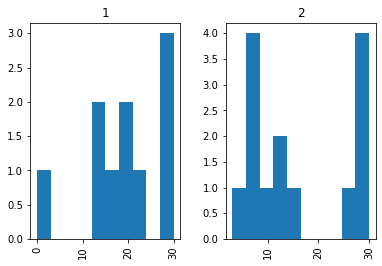

In [35]:
hist1 = orders_filt1['days_since_prior_order'].hist(by=orders_filt1.user_id)

We can see that plotting a histogram of each customer's order distribution by "days since prior order" gives something like a profile for each customer's ordering habits. We will extend this idea for everyone.

In [36]:
#try1 = orders_filt.groupby(['user_id','days_since_prior_order']).size()
#Size returns a series

In [37]:
#try1

In [38]:
# returns the most recent order for every customer by indexing the larger dataframe of filtered orders
idx1 = orders_filt.groupby(['user_id'])['order_number'].transform(max) == orders_filt['order_number']
group1 = orders_filt[~idx1]

In [39]:
group1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0


In [40]:
groupby1 = group1.groupby(['user_id','days_since_prior_order']).size()

In [41]:
groupby1_pct = groupby1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [42]:
groupby1_pct

user_id  days_since_prior_order
1        0.0                       11.111111
         14.0                      11.111111
         15.0                      11.111111
         19.0                      11.111111
         20.0                      11.111111
                                     ...    
206209   9.0                        8.333333
         18.0                       8.333333
         22.0                      16.666667
         29.0                       8.333333
         30.0                      25.000000
Length: 945634, dtype: float64

In [43]:
g1a = groupby1_pct.unstack(level='days_since_prior_order')

In [44]:
# Now we have a dataframe that is independent of the number of orders per customer, as each column is a percentage of a customer's total orders
# In this case, the most recent orders (which are the ones we are trying to predict) have been taken out
g1a

days_since_prior_order,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,11.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.111111,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,11.111111
2,NaN,NaN,NaN,7.692308,NaN,NaN,7.692308,NaN,23.076923,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.692308,7.692308,NaN,15.384615
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,5.263158,10.526316,5.263158,5.263158,5.263158,21.052632,5.263158,10.526316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.263158,NaN,10.526316
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,5.555556,NaN,NaN,NaN,NaN,NaN,5.555556,5.555556,NaN,5.555556,...,5.555556,NaN,NaN,5.555556,NaN,NaN,11.111111,5.555556,NaN,5.555556
206200,9.090909,13.636364,NaN,NaN,13.636364,NaN,9.090909,9.090909,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.545455,NaN,4.545455
206203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,75.000000


In [45]:
g1a.columns

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,
              22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0],
             dtype='float64', name='days_since_prior_order')

In [46]:
# How many orders per person are we even dealing with?
try2 = orders_filt.groupby('user_id')['order_number'].max()

In [47]:
try2

user_id
1         11
2         15
5          5
7         21
8          4
          ..
206199    20
206200    24
206203     6
206205     4
206209    14
Name: order_number, Length: 131209, dtype: int64

In [48]:
orders_filt[orders_filt['user_id']==8] #This person is tied for the minimum number of orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
75,600894,8,prior,1,6,0,NaN
76,2979257,8,prior,2,1,8,30.0
77,2570360,8,prior,3,5,0,30.0
78,880375,8,train,4,1,14,10.0


In [49]:
# recalling our indexing for most recent order from earlier
idx1 = orders_filt.groupby(['user_id'])['order_number'].transform(max) == orders_filt['order_number']
groupie2 = orders_filt[idx1]

In [50]:
groupie2

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0
...,...,...,...,...,...,...,...
3420838,2585586,206199,train,20,2,16,30.0
3420862,943915,206200,train,24,6,19,6.0
3420924,2371631,206203,train,6,4,19,30.0
3420933,1716008,206205,train,4,1,16,10.0


In [51]:
groupie2.set_index('user_id', inplace=True)

In [52]:
groupie2

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,1187899,train,11,4,8,14.0
2,1492625,train,15,1,11,30.0
5,2196797,train,5,0,11,6.0
7,525192,train,21,2,11,6.0
8,880375,train,4,1,14,10.0
...,...,...,...,...,...,...
206199,2585586,train,20,2,16,30.0
206200,943915,train,24,6,19,6.0
206203,2371631,train,6,4,19,30.0


In [53]:
group1b = g1a

In [54]:
group1b['prev'] = groupie2['days_since_prior_order']

In [55]:
group1b

days_since_prior_order,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,prev
user_id,,,,,,,,,,,,,,,,,,,,,
1,11.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,11.111111,14.0
2,NaN,NaN,NaN,7.692308,NaN,NaN,7.692308,NaN,23.076923,NaN,...,NaN,NaN,NaN,NaN,NaN,7.692308,7.692308,NaN,15.384615,30.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,NaN,NaN,5.263158,10.526316,5.263158,5.263158,5.263158,21.052632,5.263158,10.526316,...,NaN,NaN,NaN,NaN,NaN,NaN,5.263158,NaN,10.526316,6.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,5.555556,NaN,NaN,NaN,NaN,NaN,5.555556,5.555556,NaN,5.555556,...,NaN,NaN,5.555556,NaN,NaN,11.111111,5.555556,NaN,5.555556,30.0
206200,9.090909,13.636364,NaN,NaN,13.636364,NaN,9.090909,9.090909,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.545455,NaN,4.545455,6.0
206203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,75.000000,30.0


In [56]:
idx2 = orders_filt.groupby(['user_id'])['order_number'].transform(max)-1 == orders_filt['order_number']
groupie3 = orders_filt[idx2]

In [57]:
groupie3

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
9,2550362,1,prior,10,4,8,30.0
24,839880,2,prior,14,3,10,13.0
48,157374,5,prior,4,1,18,19.0
73,2452257,7,prior,20,3,9,7.0
77,2570360,8,prior,3,5,0,30.0
...,...,...,...,...,...,...,...
3420837,1932632,206199,prior,19,5,15,27.0
3420861,1909878,206200,prior,23,0,19,1.0
3420923,133582,206203,prior,5,5,18,30.0
3420932,414137,206205,prior,3,5,16,10.0


In [58]:
groupie3.set_index('user_id', inplace=True)

In [59]:
group1b['2_prev'] = groupie3['days_since_prior_order']

In [60]:
idx3 = orders_filt.groupby(['user_id'])['order_number'].transform(max)-2 == orders_filt['order_number']
groupie4 = orders_filt[idx3].set_index('user_id')

In [61]:
group1b['3_prev'] = groupie4['days_since_prior_order']

In [62]:
group1b.fillna(0,inplace=True)

In [63]:
group1b

days_since_prior_order,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,24.0,25.0,26.0,27.0,28.0,29.0,30.0,prev,2_prev,3_prev
user_id,,,,,,,,,,,,,,,,,,,,,
1,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,11.111111,11.111111,11.111111,14.0,30.0,0.0
2,0.000000,0.000000,0.000000,7.692308,0.000000,0.000000,7.692308,0.000000,23.076923,0.000000,...,0.000000,0.0,0.0,7.692308,7.692308,0.000000,15.384615,30.0,13.0,30.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,6.0,19.0,10.0
7,0.000000,0.000000,5.263158,10.526316,5.263158,5.263158,5.263158,21.052632,5.263158,10.526316,...,0.000000,0.0,0.0,0.000000,5.263158,0.000000,10.526316,6.0,7.0,3.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,100.000000,10.0,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,5.555556,0.000000,0.000000,0.000000,0.000000,0.000000,5.555556,5.555556,0.000000,5.555556,...,5.555556,0.0,0.0,11.111111,5.555556,0.000000,5.555556,30.0,27.0,30.0
206200,9.090909,13.636364,0.000000,0.000000,13.636364,0.000000,9.090909,9.090909,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,4.545455,0.000000,4.545455,6.0,1.0,4.0
206203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,25.000000,0.000000,0.000000,75.000000,30.0,30.0,27.0


In [64]:
group1b.prev.mean(), group1b.prev.std()

(17.04985938464587, 10.676831917839612)

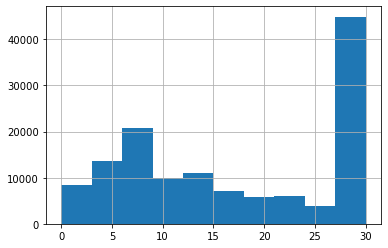

In [65]:
group1b.prev.hist()

In [66]:
group1c = pd.get_dummies(data=group1b, columns = ['2_prev','3_prev'])

In [67]:
group1c.shape

(131209, 94)

In [68]:
group1c

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,3_prev_21.0,3_prev_22.0,3_prev_23.0,3_prev_24.0,3_prev_25.0,3_prev_26.0,3_prev_27.0,3_prev_28.0,3_prev_29.0,3_prev_30.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0.000000,7.692308,0.000000,0.000000,7.692308,0.000000,23.076923,0.000000,...,0,0,0,0,0,0,0,0,0,1
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7,0.000000,0.000000,5.263158,10.526316,5.263158,5.263158,5.263158,21.052632,5.263158,10.526316,...,0,0,0,0,0,0,0,0,0,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,5.555556,0.000000,0.000000,0.000000,0.000000,0.000000,5.555556,5.555556,0.000000,5.555556,...,0,0,0,0,0,0,0,0,0,1
206200,9.090909,13.636364,0.000000,0.000000,13.636364,0.000000,9.090909,9.090909,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
206203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0


Now we have a dataframe that captures important information for all users: the distribution of their previous orders as recorded in the data and the days since prior order of their last 3 previous orders. Additionally, imputing with 0's makes sense, for if a particular user never ordered on a particular day, then the percentage of times that user ordered on that day is 0. Let's try two models first to predict days since prior order: linear regression and random forest regression.

In [69]:
# Let's start a trial without the normalization that one-hot encoding provided, as a reference
X1 = group1b.drop(columns='prev')
y1 = group1b.prev

In [70]:
from sklearn import preprocessing
from sklearn import __version__ as sklearn_version
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,
                                                    test_size=0.3, 
                                                    random_state=1)

In [72]:
lm1 = LinearRegression().fit(X1_train, y1_train)

In [73]:
y1_train_pred = lm1.predict(X1_train)
y1_test_pred = lm1.predict(X1_test)

In [74]:
mean_squared_error(y1_train, y1_train_pred), mean_squared_error(y1_test, y1_test_pred)

(87.6754753109138, 87.45411192138539)

In [75]:
rfr1 = RandomForestRegressor()
rfr1.fit(X1_train,y1_train)

RandomForestRegressor()

In [76]:
y1_pred = rfr1.predict(X1_test)
y1_train_pred_ = rfr1.predict(X1_train)

In [77]:
mean_squared_error(y1_train, y1_train_pred_), mean_squared_error(y1_test,y1_pred)

(26.65833741439903, 89.41400451511127)

So far we have a model that can predict the next order with an error of between 9-10 days.. Disregarding hyperparameter optimization for now, these two initial models perform very similarly.

Does the additional step of encoding offer any help to our model's performance?

In [78]:
X1c = group1c.drop(columns='prev')
y1c = group1c.prev

In [79]:
X1c_train, X1c_test, y1c_train, y1c_test = train_test_split(X1c,y1c,
                                                    test_size=0.3, 
                                                    random_state=1)

In [80]:
lm1c = LinearRegression(fit_intercept=False).fit(X1c_train, y1c_train)

In [81]:
y1c_train_pred = lm1c.predict(X1c_train)
y1c_test_pred = lm1c.predict(X1c_test)

In [82]:
mean_squared_error(y1c_train, y1c_train_pred), mean_squared_error(y1c_test, y1c_test_pred)

(87.57193988813117, 87.45957995096228)

In [83]:
rfr1c = RandomForestRegressor()
rfr1c.fit(X1c_train,y1c_train)

RandomForestRegressor()

In [84]:
rfr1c #Why isnt this showing the parameters?

RandomForestRegressor()

In [85]:
y1c_pred = rfr1c.predict(X1c_test)
y1c_train_pred = rfr1c.predict(X1c_train)

In [86]:
mean_squared_error(y1c_train, y1c_train_pred), mean_squared_error(y1c_test,y1c_pred)

(26.72383953646597, 90.00205105933789)

It would seem that the addition of one-hot encoding for the added columns does not improve the performance of our initial models, so perhaps it would be beneficial to try a different model. A support vector machine could be used, as it works with high dimensionality.

However, before trying that, we can also try to analyze the metrics of our error space: how is the error distributed? Are there any trends we can find? From the comparisons of the models' predictions on train v test set data, the fact that it performs significantly better on the training sets would indicate that there is a level of overfitting going on.

Text(0, 0.5, 'train_predict')

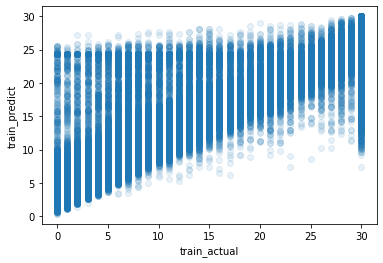

In [87]:
# Plotting train set predicted v actual data
plt.scatter(y1c_train, y1c_train_pred, alpha=0.1);
plt.xlabel('train_actual')
plt.ylabel('train_predict')

Text(0, 0.5, 'test_predict')

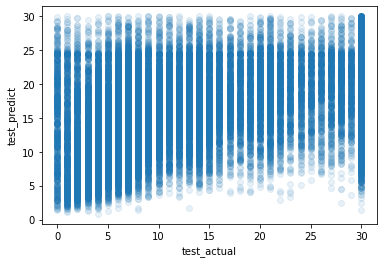

In [88]:
# Plotting test set predicted v actual data
plt.scatter(y1c_test,y1c_pred, alpha=0.1);
plt.xlabel('test_actual')
plt.ylabel('test_predict')

In [89]:
diff_train = y1c_train_pred - y1c_train
diff_test = y1c_pred - y1c_test

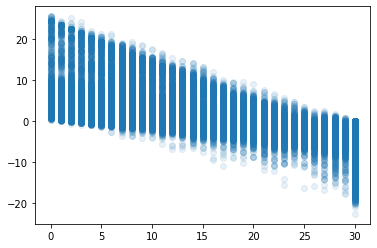

In [90]:
plt.scatter(y1c_train,diff_train, alpha=0.1);

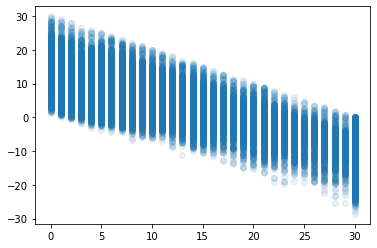

In [91]:
plt.scatter(y1c_test, diff_test,alpha=0.1);

In [92]:
#SVM
from sklearn import svm

In [93]:
SVReg1 = svm.SVR().fit(X1c_train, y1c_train)

In [94]:
y1c_pred_SVM1 = SVReg1.predict(X1c_test)
y1c_pred_SVM1_train = SVReg1.predict(X1c_train)

KeyboardInterrupt: 

In [ ]:
mean_squared_error(y1c_train, y1c_pred_SVM1_train), mean_squared_error(y1c_test, y1c_pred_SVM1)

Unlike the random forest model, the SV regressor yields similar MSEs for both training and test data sets, indicating that it is not overfitting, but it is currently giving a lower overall accuracy. Let's try tuning our models to see if we can improve overall results. What else can we try to improve our results overall?


## Saving Work

Our next task will be to then use the information we've learned so far to predict the actual contents of a given customer's most recent cart. But first...

In [95]:
datapath = 'C:/Users/Max/Documents/Projects/Instacart Market Basket/Data/Data_Edits'

if not os.path.exists(datapath):
    os.mkdir(datapath)

In [96]:
datapath_cleaned = os.path.join(datapath, 'df_prior.csv')
if not os.path.exists(datapath_cleaned):
    df_prior.to_csv(datapath_cleaned, index=False)

In [97]:
datapath_cleaned = os.path.join(datapath, 'orders_all_filt.csv')
if not os.path.exists(datapath_cleaned):
    orders_all_filt.to_csv(datapath_cleaned, index=False)

In [98]:
datapath_cleaned = os.path.join(datapath, 'orders_af.csv')
if not os.path.exists(datapath_cleaned):
    orders_af.to_csv(datapath_cleaned, index=False)